In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#2228 total number
#1522 dead
#1317 passengers 
#3024 1st
#284 2nd
#709 3rd

#805 male
#434 female
#112 children

In [3]:
df = pd.read_csv(r'/Users/Molnar/Documents/GitHub/Bagging-Boosting-Voting/train.csv') 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---

# Data Exploration

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
num_df = df[['Survived','Pclass','Age','SibSp','Parch','Fare']]
num_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


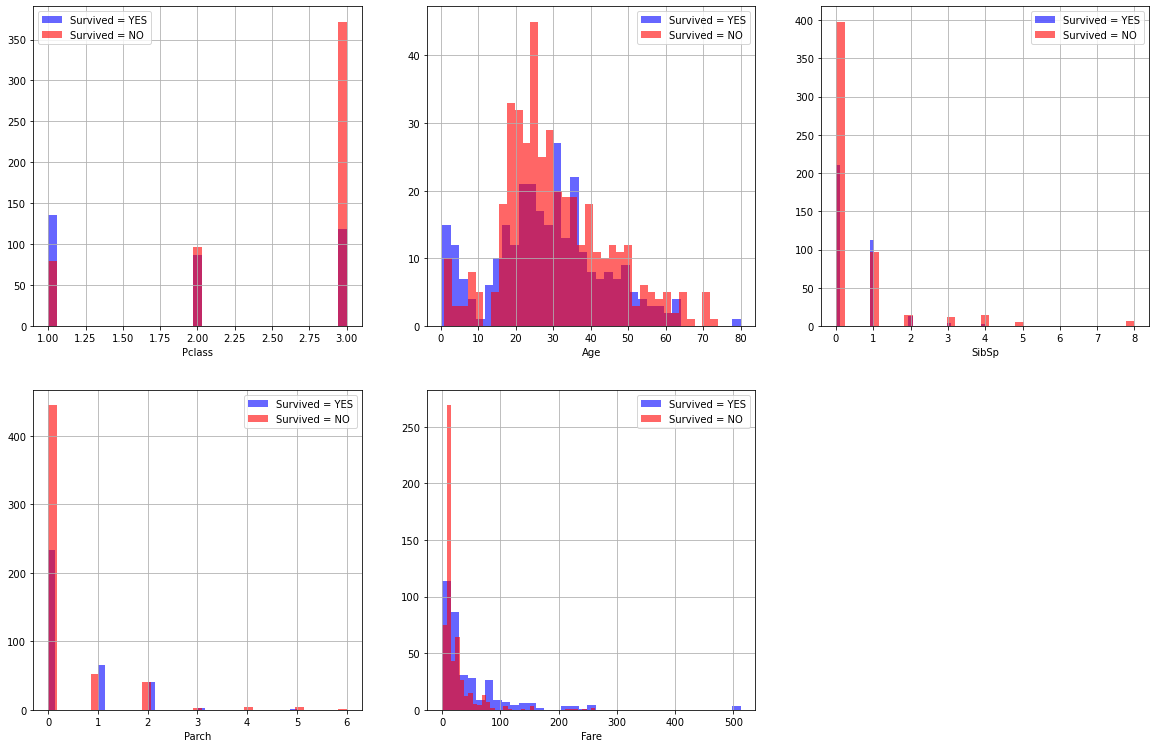

In [7]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(num_df.columns[list(range(1, num_df.shape[1]))], 1):
    plt.subplot(3, 3, i)
    num_df[num_df["Survived"] == 1][column].hist(bins=35, color='blue', label='Survived = YES', alpha=0.6)
    num_df[num_df["Survived"] == 0][column].hist(bins=35, color='red', label='Survived = NO', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

<Figure size 2160x2160 with 0 Axes>

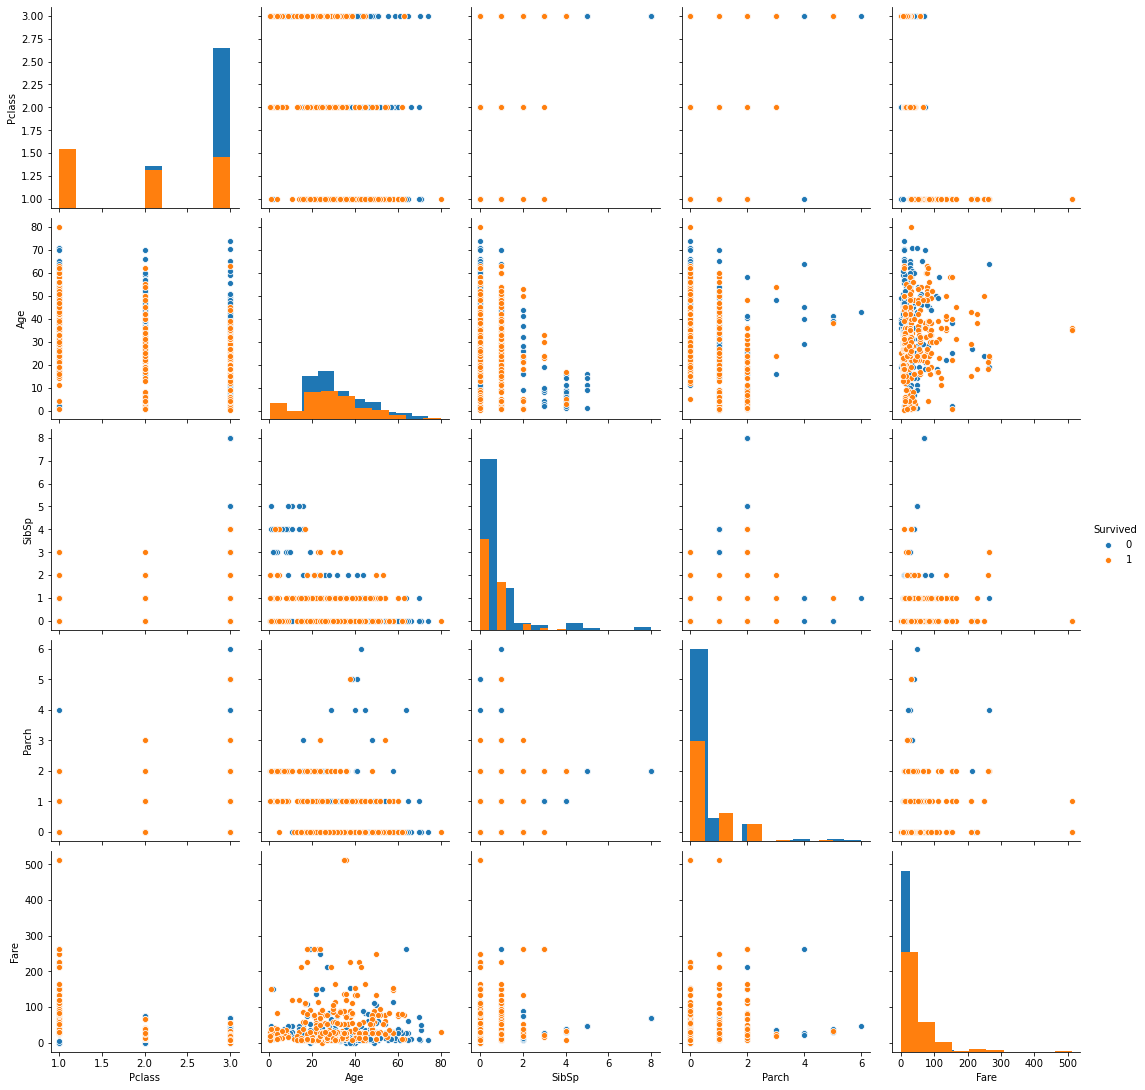

In [8]:
plt.figure(figsize=(30, 30))
sns.pairplot(num_df, hue='Survived', height=3, diag_kind='hist')

In [9]:
#I can create a dataframe only with categorical variables
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.drop('Name', axis=1, inplace = True)
#obj_df.drop('Embarked', axis=1, inplace = True)
#obj_df.drop('Cabin', axis=1, inplace = True)
#obj_df.drop('Sex', axis=1, inplace = True)
obj_df.head()

,Sex,Ticket,Cabin,Embarked
0,male,A/5 21171,NaN,S
1,female,PC 17599,C85,C
2,female,STON/O2. 3101282,NaN,S
3,female,113803,C123,S
4,male,373450,NaN,S


In [10]:
obj_df['Cabin'].fillna(value='No-Value', inplace=True)
obj_df['Embarked'].fillna(value='No-Value', inplace=True)
obj_df.head()

,Sex,Ticket,Cabin,Embarked
0,male,A/5 21171,No-Value,S
1,female,PC 17599,C85,C
2,female,STON/O2. 3101282,No-Value,S
3,female,113803,C123,S
4,male,373450,No-Value,S


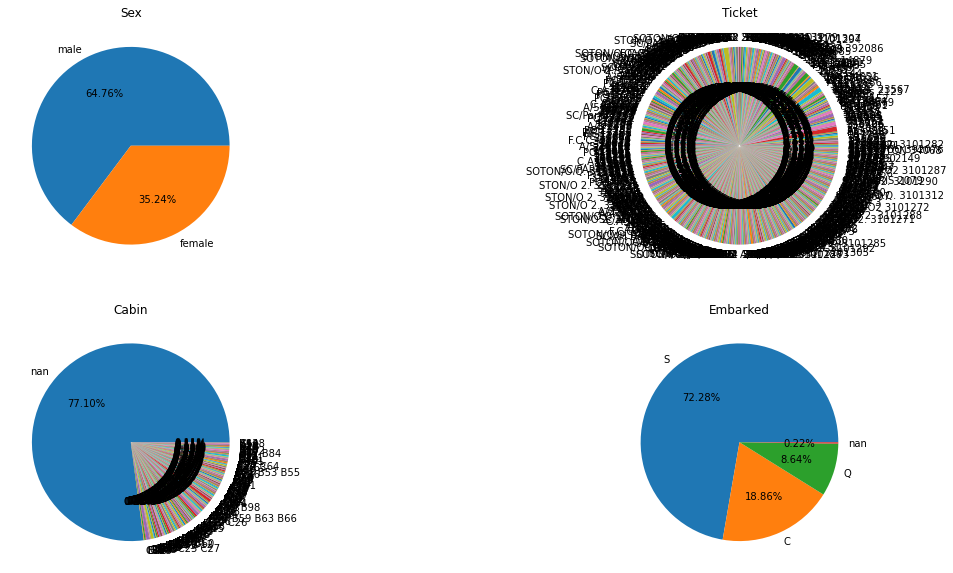

In [11]:
from collections import Counter
plt.figure(figsize=(20, 10))
for i, column in enumerate(obj_df.columns[list(range(0, obj_df.shape[1]))], 1):
    plt.subplot(2, 2, i)
    count = Counter(df[column])
    plt.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
    plt.title(column)

In [12]:
from sklearn.preprocessing import LabelEncoder
object_cols = obj_df.columns
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(obj_df[col])

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,146,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,146,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,55,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,146,3


Split the data into training and testing set and afterwards start with the feature engineering. 

In [14]:
#creating a new variable with the real value for the fare
df['FareCorr']=df['Fare']/(df['SibSp']+df['Parch']+1)

#indicating which lines had NaN values for age
df['age_NaN'] = df['Age'].isnull()

In [15]:
#replacing NaN in age for the mean
df['Age'].fillna(value=df['Age'].mean(), inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareCorr,age_NaN
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,146,3,3.62500,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,81,0,35.64165,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,146,3,7.92500,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,55,3,26.55000,False
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,146,3,8.05000,False


In [16]:
df['age_NaN'].value_counts(normalize=True)

False    0.801347
True     0.198653
Name: age_NaN, dtype: float64

In [17]:
#creating dummy variables for the catergorical columns 'Sex' and 'age_NaN'
df = pd.get_dummies(df, columns = ['age_NaN'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareCorr,age_NaN_False,age_NaN_True
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,146,3,3.62500,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,81,0,35.64165,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,146,3,7.92500,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,55,3,26.55000,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,146,3,8.05000,1,0


In [18]:
df['age_NaN_True'].value_counts(normalize=True)

0    0.801347
1    0.198653
Name: age_NaN_True, dtype: float64

In [19]:
df1 = df[['Survived','Pclass','SibSp','Parch','FareCorr','Age','age_NaN_True','Sex','Ticket','Cabin','Embarked']]
df1.head()

,Survived,Pclass,SibSp,Parch,FareCorr,Age,age_NaN_True,Sex,Ticket,Cabin,Embarked
0,0,3,1,0,3.62500,22.0,0,1,523,146,3
1,1,1,1,0,35.64165,38.0,0,0,596,81,0
2,1,3,0,0,7.92500,26.0,0,0,669,146,3
3,1,1,1,0,26.55000,35.0,0,0,49,55,3
4,0,3,0,0,8.05000,35.0,0,1,472,146,3


-----

# Model Preparation

In [20]:
#Variables that we use to make the prediction in our model
Feature2 = df1.drop(['Survived'], axis=1)
Feature2.head()

,Pclass,SibSp,Parch,FareCorr,Age,age_NaN_True,Sex,Ticket,Cabin,Embarked
0,3,1,0,3.62500,22.0,0,1,523,146,3
1,1,1,0,35.64165,38.0,0,0,596,81,0
2,3,0,0,7.92500,26.0,0,0,669,146,3
3,1,1,0,26.55000,35.0,0,0,49,55,3
4,3,0,0,8.05000,35.0,0,1,472,146,3


In [21]:
# Standardizing the parametres
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(Feature2).transform(Feature2)
X[0:5]

array([[ 0.82737724,  0.43279337, -0.47367361, -0.4547978 , -0.5924806 ,
        -0.49789473,  0.73769513,  0.91896631,  0.44944137,  0.56273365],
       [-1.56610693,  0.43279337, -0.47367361,  0.43899428,  0.63878901,
        -0.49789473, -1.35557354,  1.28262456, -1.37347318, -2.00852627],
       [ 0.82737724, -0.4745452 , -0.47367361, -0.33475695, -0.2846632 ,
        -0.49789473, -1.35557354,  1.64628282,  0.44944137,  0.56273365],
       [-1.56610693,  0.43279337, -0.47367361,  0.18518744,  0.40792596,
        -0.49789473, -1.35557354, -1.44232155, -2.10263899,  0.56273365],
       [ 0.82737724, -0.4745452 , -0.47367361, -0.33126739,  0.40792596,
        -0.49789473,  0.73769513,  0.66490369,  0.44944137,  0.56273365]])

In [22]:
# Target variable
y = df1['Survived'].values
y[0:5]

array([0, 1, 1, 1, 0])

In [23]:
#inputs for the models
rand_state=13
n_est=1000
t_size=0.10

In [24]:
# Splitting the data two samples, training (90 %) and test (10 %) datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=t_size, random_state=rand_state)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (801, 10) (801,)
Test set: (90, 10) (90,)


# Bagging Algoritms

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")


-----

## Decision Tree

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=n_est, random_state=rand_state)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[489   1]
 [  0 311]]
ACCURACY SCORE:
0.9988
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.996795  0.998752    0.998397      0.998756
recall       0.997959    1.000000  0.998752    0.998980      0.998752
f1-score     0.998979    0.998395  0.998752    0.998687      0.998752
support    490.000000  311.000000  0.998752  801.000000    801.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[53  6]
 [ 6 25]]
ACCURACY SCORE:
0.8667
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.898305   0.806452  0.866667   0.852378      0.866667
recall      0.898305   0.806452  0.866667   0.852378      0.866667
f1-score    0.898305   0.806452  0.866667   0.852378      0.866667
support    59.000000  31.000000  0.866667  90.000000     90.000000


In [27]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}

In [28]:
scores

{'Bagging Classifier': {'Train': 0.9987515605493134,
  'Test': 0.8666666666666667}}

-----

-----

## Random Forrest

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=rand_state, n_estimators=n_est)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[489   1]
 [  0 311]]
ACCURACY SCORE:
0.9988
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.996795  0.998752    0.998397      0.998756
recall       0.997959    1.000000  0.998752    0.998980      0.998752
f1-score     0.998979    0.998395  0.998752    0.998687      0.998752
support    490.000000  311.000000  0.998752  801.000000    801.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[54  5]
 [ 6 25]]
ACCURACY SCORE:
0.8778
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.900000   0.833333  0.877778   0.866667      0.877037
recall      0.915254   0.806452  0.877778   0.860853      0.877778
f1-score    0.907563   0.819672  0.877778   0.863618      0.877289
support    59.000000  31.000000  0.877778  90.000000     90.000000


In [30]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

In [31]:
scores

{'Bagging Classifier': {'Train': 0.9987515605493134,
  'Test': 0.8666666666666667},
 'Random Forest': {'Train': 0.9987515605493134, 'Test': 0.8777777777777778}}

-----

## Extra Trees

In [32]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=n_est, max_features=7, random_state=rand_state)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[489   1]
 [  0 311]]
ACCURACY SCORE:
0.9988
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.996795  0.998752    0.998397      0.998756
recall       0.997959    1.000000  0.998752    0.998980      0.998752
f1-score     0.998979    0.998395  0.998752    0.998687      0.998752
support    490.000000  311.000000  0.998752  801.000000    801.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[53  6]
 [ 6 25]]
ACCURACY SCORE:
0.8667
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.898305   0.806452  0.866667   0.852378      0.866667
recall      0.898305   0.806452  0.866667   0.852378      0.866667
f1-score    0.898305   0.806452  0.866667   0.852378      0.866667
support    59.000000  31.000000  0.866667  90.000000     90.000000


In [33]:
scores['Extra Tree'] = {
        'Train': accuracy_score(y_train, ex_tree_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ex_tree_clf.predict(X_test)),
    }

In [34]:
scores

{'Bagging Classifier': {'Train': 0.9987515605493134,
  'Test': 0.8666666666666667},
 'Random Forest': {'Train': 0.9987515605493134, 'Test': 0.8777777777777778},
 'Extra Tree': {'Train': 0.9987515605493134, 'Test': 0.8666666666666667}}

-------

# Boosting Algoritms

## AdaBoost

In [35]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=n_est)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[468  22]
 [ 32 279]]
ACCURACY SCORE:
0.9326
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.936000    0.926910  0.932584    0.931455      0.932471
recall       0.955102    0.897106  0.932584    0.926104      0.932584
f1-score     0.945455    0.911765  0.932584    0.928610      0.932374
support    490.000000  311.000000  0.932584  801.000000    801.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[50  9]
 [ 7 24]]
ACCURACY SCORE:
0.8222
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.877193   0.727273  0.822222   0.802233      0.825554
recall      0.847458   0.774194  0.822222   0.810826      0.822222
f1-score    0.862069   0.750000  0.822222   0.806034      0.823467
support    59.000000  31.000000  0.822222  90.000000     90.000000


In [36]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

In [37]:
scores

{'Bagging Classifier': {'Train': 0.9987515605493134,
  'Test': 0.8666666666666667},
 'Random Forest': {'Train': 0.9987515605493134, 'Test': 0.8777777777777778},
 'Extra Tree': {'Train': 0.9987515605493134, 'Test': 0.8666666666666667},
 'AdaBoost': {'Train': 0.9325842696629213, 'Test': 0.8222222222222222}}

-----

## Stochastic Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=n_est, random_state=rand_state)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[489   1]
 [  0 311]]
ACCURACY SCORE:
0.9988
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.996795  0.998752    0.998397      0.998756
recall       0.997959    1.000000  0.998752    0.998980      0.998752
f1-score     0.998979    0.998395  0.998752    0.998687      0.998752
support    490.000000  311.000000  0.998752  801.000000    801.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[52  7]
 [ 4 27]]
ACCURACY SCORE:
0.8778
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.928571   0.794118  0.877778   0.861345      0.882260
recall      0.881356   0.870968  0.877778   0.876162      0.877778
f1-score    0.904348   0.830769  0.877778   0.867559      0.879004
support    59.000000  31.000000  0.877778  90.000000     90.000000


In [39]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }

In [40]:
scores

{'Bagging Classifier': {'Train': 0.9987515605493134,
  'Test': 0.8666666666666667},
 'Random Forest': {'Train': 0.9987515605493134, 'Test': 0.8777777777777778},
 'Extra Tree': {'Train': 0.9987515605493134, 'Test': 0.8666666666666667},
 'AdaBoost': {'Train': 0.9325842696629213, 'Test': 0.8222222222222222},
 'Gradient Boosting': {'Train': 0.9987515605493134,
  'Test': 0.8777777777777778}}

-----

# Voting Ensemble

In [41]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[447  43]
 [ 75 236]]
ACCURACY SCORE:
0.8527
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.856322    0.845878  0.852684    0.851100      0.852267
recall       0.912245    0.758842  0.852684    0.835544      0.852684
f1-score     0.883399    0.800000  0.852684    0.841700      0.851018
support    490.000000  311.000000  0.852684  801.000000    801.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[54  5]
 [ 7 24]]
ACCURACY SCORE:
0.8667
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.885246   0.827586  0.866667   0.856416      0.865385
recall      0.915254   0.774194  0.866667   0.844724      0.866667
f1-score    0.900000   0.800000  0.866667   0.850000      0.865556
support    59.000000  31.000000  0.866667  90.000000     90.000000


In [42]:
estimators

[('Logistic', LogisticRegression(solver='liblinear')),
 ('Tree', DecisionTreeClassifier()),
 ('SVM', SVC())]

In [43]:
scores['Voting'] = {
        'Train': accuracy_score(y_train, voting.predict(X_train)),
        'Test': accuracy_score(y_test, voting.predict(X_test)),
    }

----

# Stacking Ensemble



* We can use sklearns **StackingClassifier** and **StackingRegressor** to for classification and regression problem respectively.
* Since "lasso" is our best performing model we will use it as our meta learner and rest models as base estimators.

In [44]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stack.fit(X_train, y_train)

#pred = stack.predict(X_test)

evaluate(stack, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[455  35]
 [ 74 237]]
ACCURACY SCORE:
0.8639
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.860113    0.871324   0.86392    0.865718      0.864466
recall       0.928571    0.762058   0.86392    0.845315      0.863920
f1-score     0.893032    0.813036   0.86392    0.853034      0.861973
support    490.000000  311.000000   0.86392  801.000000    801.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[54  5]
 [ 7 24]]
ACCURACY SCORE:
0.8667
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.885246   0.827586  0.866667   0.856416      0.865385
recall      0.915254   0.774194  0.866667   0.844724      0.866667
f1-score    0.900000   0.800000  0.866667   0.850000      0.865556
support    59.000000  31.000000  0.866667  90.000000     90.000000


In [45]:
scores['Stacking'] = {
        'Train': accuracy_score(y_train, stack.predict(X_train)),
        'Test': accuracy_score(y_test, stack.predict(X_test)),
    }

----

# Results

In [46]:
scores_df = pd.DataFrame(scores)

#scores_df.plot(kind='barh', figsize=(15, 8))

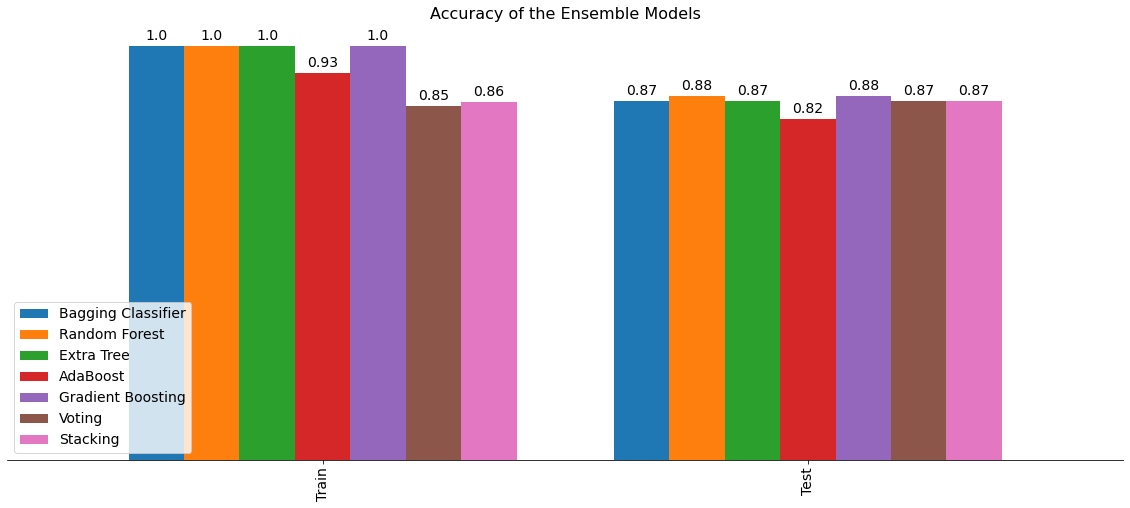

In [47]:
#,color=['#5cb85c','#5bc0de','#d9534f']
ax=scores_df.plot(kind='bar', figsize=(20, 8), width=0.8,fontsize=14) 
plt.legend(fontsize=14,loc="lower left")
plt.title("Accuracy of the Ensemble Models",fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2),
                                (p.get_x()+p.get_width()/2., p.get_height()),
                                ha='center',va='center',xytext=(0, 10),textcoords='offset points',fontsize=14) 
plt.show()

# Final prediction

In [48]:
dfp = pd.read_csv(r'/Users/Molnar/Documents/GitHub/Bagging-Boosting-Voting/test.csv') 

In [49]:
dfp.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [50]:
dfp['Fare'].fillna(value=dfp['Fare'].fillna(0), inplace=True)

In [51]:
dfp.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [52]:
#I can create a dataframe only with categorical variables
obj_dfp = dfp.select_dtypes(include=['object']).copy()
obj_dfp.drop('Name', axis=1, inplace = True)
obj_dfp.head()

,Sex,Ticket,Cabin,Embarked
0,male,330911,NaN,Q
1,female,363272,NaN,S
2,male,240276,NaN,Q
3,male,315154,NaN,S
4,female,3101298,NaN,S


In [53]:
obj_dfp['Cabin'].fillna(value='No-Value', inplace=True)
#obj_dfp['Embarked'].fillna(value='No-Value', inplace=True)
obj_dfp.head()

,Sex,Ticket,Cabin,Embarked
0,male,330911,No-Value,Q
1,female,363272,No-Value,S
2,male,240276,No-Value,Q
3,male,315154,No-Value,S
4,female,3101298,No-Value,S


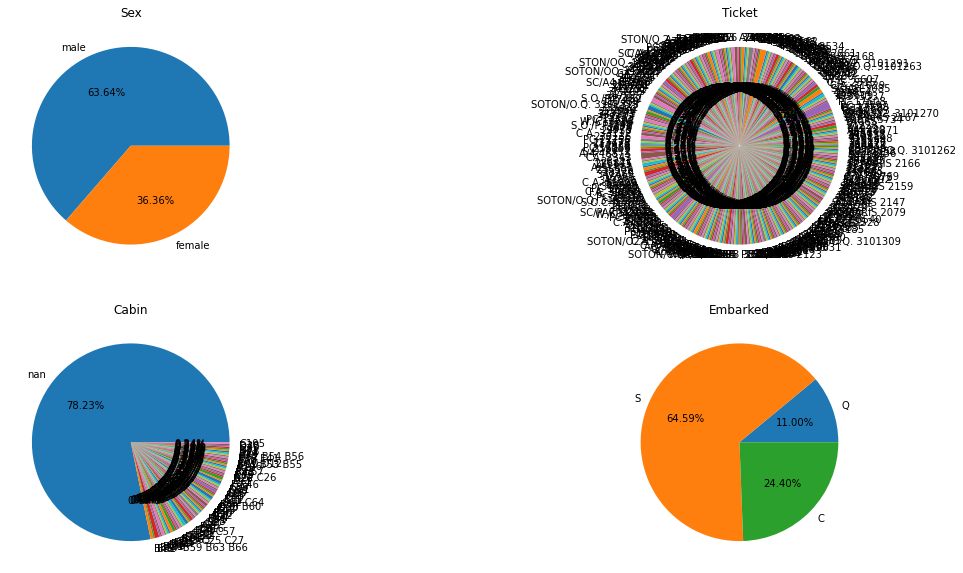

In [54]:
from collections import Counter
plt.figure(figsize=(20, 10))
for i, column in enumerate(obj_dfp.columns[list(range(0, obj_dfp.shape[1]))], 1):
    plt.subplot(2, 2, i)
    count = Counter(dfp[column])
    plt.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
    plt.title(column)

In [55]:
from sklearn.preprocessing import LabelEncoder

object_cols = obj_dfp.columns
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    dfp[col] = label_encoder.fit_transform(obj_dfp[col])

In [56]:
dfp.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,152,7.8292,76,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,221,7.0000,76,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,73,9.6875,76,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,147,8.6625,76,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,138,12.2875,76,2


Split the data into training and testing set and afterwards start with the feature engineering. 

In [57]:
#creating a new variable with the real value for the fare
dfp['FareCorr']=dfp['Fare']/(dfp['SibSp']+dfp['Parch']+1)

#indicating which lines had NaN values for age
dfp['age_NaN'] = dfp['Age'].isnull()

In [58]:
#replacing NaN in age for the mean
dfp['Age'].fillna(value=dfp['Age'].mean(), inplace=True)
dfp.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareCorr,age_NaN
0,892,3,"Kelly, Mr. James",1,34.5,0,0,152,7.8292,76,1,7.829200,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,221,7.0000,76,2,3.500000,False
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,73,9.6875,76,1,9.687500,False
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,147,8.6625,76,2,8.662500,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,138,12.2875,76,2,4.095833,False


In [59]:
dfp['age_NaN'].value_counts(normalize=True)

False    0.794258
True     0.205742
Name: age_NaN, dtype: float64

In [60]:
#creating dummy variables for the catergorical columns 'Sex' and 'age_NaN'
dfp = pd.get_dummies(dfp, columns = ['age_NaN'])
dfp.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareCorr,age_NaN_False,age_NaN_True
0,892,3,"Kelly, Mr. James",1,34.5,0,0,152,7.8292,76,1,7.829200,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,221,7.0000,76,2,3.500000,1,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,73,9.6875,76,1,9.687500,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,147,8.6625,76,2,8.662500,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,138,12.2875,76,2,4.095833,1,0


In [61]:
dfp['age_NaN_True'].value_counts(normalize=True)

0    0.794258
1    0.205742
Name: age_NaN_True, dtype: float64

In [62]:
df1p = dfp[['Pclass','SibSp','Parch','FareCorr','Age','age_NaN_True','Sex','Ticket','Cabin','Embarked']]
df1p.head()

,Pclass,SibSp,Parch,FareCorr,Age,age_NaN_True,Sex,Ticket,Cabin,Embarked
0,3,0,0,7.829200,34.5,0,1,152,76,1
1,3,1,0,3.500000,47.0,0,0,221,76,2
2,2,0,0,9.687500,62.0,0,1,73,76,1
3,3,0,0,8.662500,27.0,0,1,147,76,2
4,3,1,1,4.095833,22.0,0,0,138,76,2


-----

# Model Preparation

In [63]:
#Variables that we use to make the prediction in our model
Featurep = df1p
Featurep.head()

,Pclass,SibSp,Parch,FareCorr,Age,age_NaN_True,Sex,Ticket,Cabin,Embarked
0,3,0,0,7.829200,34.5,0,1,152,76,1
1,3,1,0,3.500000,47.0,0,0,221,76,2
2,2,0,0,9.687500,62.0,0,1,73,76,1
3,3,0,0,8.662500,27.0,0,1,147,76,2
4,3,1,1,4.095833,22.0,0,0,138,76,2


In [64]:
# Standardizing the parametres
from sklearn import preprocessing
Xp= preprocessing.StandardScaler().fit(Featurep).transform(Featurep)
Xp[0:5]

array([[ 0.87348191, -0.49947002, -0.4002477 , -0.39141578,  0.3349926 ,
        -0.50895594,  0.75592895, -0.26949361,  0.44902203, -0.47091535],
       [ 0.87348191,  0.61699237, -0.4002477 , -0.51312388,  1.32553003,
        -0.50895594, -1.32287566,  0.37293425,  0.44902203,  0.70076689],
       [-0.31581919, -0.49947002, -0.4002477 , -0.33917284,  2.51417495,
        -0.50895594,  0.75592895, -1.00502694,  0.44902203, -0.47091535],
       [ 0.87348191, -0.49947002, -0.4002477 , -0.36798897, -0.25932986,
        -0.50895594,  0.75592895, -0.31604635,  0.44902203,  0.70076689],
       [ 0.87348191,  0.61699237,  0.61989583, -0.49637304, -0.65554483,
        -0.50895594, -1.32287566, -0.39984129,  0.44902203,  0.70076689]])

In [71]:
pred = stack.predict(Xp)

In [72]:
df_pred = pd.DataFrame(data=pred,columns=["Survived"])

In [73]:
df_predictions= pd.concat([dfp['PassengerId'],df_pred], axis=1, sort=False)
df_predictions.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [75]:
df_predictions.to_csv(r'/Users/Molnar/Documents/GitHub/Bagging-Boosting-Voting/gender_submission.csv', index = False)

## Authors:

### Daniel Molnar & Vanessa Koch